In [13]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor

In [22]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")
#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
# df.drop(["Fluxo"],inplace=True,axis=1)

In [7]:
data_train = df[["DT_COMPTC"]][:3000]

#dados de treino
X_train = df.drop(["cap","DT_COMPTC"],axis=1)[:3000]
y_train = df[["cap"]][:3000]

#não sei bem pra que isso mas ajuda
data_test = df[["DT_COMPTC"]][3000:]

#dados de teste
X_test = df.drop(["cap","DT_COMPTC"],axis=1)[3000:]
y_test = df[["cap"]][3000:]

In [8]:
#padroniza os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
# y_test = scaler.fit_transform(y_test)

In [14]:
# params = {
#     "n_estimators" : [45,50,75],
#     "max_depth" : [1,2,3],
#     "bootstrap" : [True],
#     "n_jobs"  : [-1]
# }

params = {
    "activation" : ["identity","logistic","tanh","relu"],
    "solver":["lbfgs","sgd","adam"],
    "shuffle":[True,False],
    "early_stopping":[True,False],

} 

gs = GridSearchCV(MLPRegressor(),params)

In [15]:
gs.fit(X_train,y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Pyt

GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'early_stopping': [True, False],
                         'shuffle': [True, False],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [16]:
gs.best_params_

{'activation': 'relu',
 'early_stopping': True,
 'shuffle': True,
 'solver': 'adam'}

In [18]:
model = gs.best_estimator_
tscv = TimeSeriesSplit()
cv_results = cross_val_score(MLPRegressor(activation= 'relu',
 early_stopping= True,
 shuffle= True,
 solver= "adam"),X_train,y_train,cv=5,scoring=make_scorer(mean_squared_error))


print(cv_results)

# model = RandomForestRegressor(1000)

# model.fit(X_train,y_train)

resposta = model.predict(X_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\

[ 6974.07913721 40045.38780607 43796.968718   72254.91288196
  4683.58430716]


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
df.corr()

,IBOV,Dol,NDX,SPX,cap
IBOV,1.000000,0.635266,0.833133,0.797355,0.649174
Dol,0.635266,1.000000,0.925298,0.904620,0.513351
NDX,0.833133,0.925298,1.000000,0.977992,0.597829
SPX,0.797355,0.904620,0.977992,1.000000,0.568180
cap,0.649174,0.513351,0.597829,0.568180,1.000000


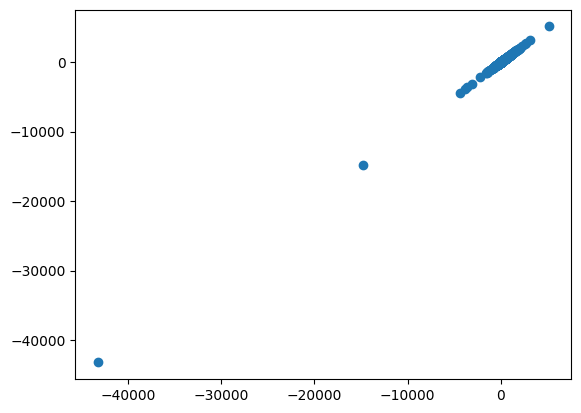

In [23]:
# plt.scatter(df["cap"],df["IBOV"])
# plt.scatter(df["cap"],df["NDX"])
plt.scatter(df["cap"]-df["resg"],df["Fluxo"])

In [ ]:
df3 = pd.read_csv("../data/test.csv")

resposta = model.predict()